In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Read the file with its current encoding (try 'latin1', 'ISO-8859-1', or 'cp1252')
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')  # or whatever encoding works

# Save it back as UTF-8
df.to_csv("Sample - Superstore_utf8.csv", index=False, encoding='utf-8')

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example approaches)
df['Postal Code'] = df['Postal Code'].fillna('Unknown')  # For categorical
df['Profit'] = df['Profit'].fillna(df['Profit'].median())  # For numerical

Row ID              0
Order ID            0
Order Date       9994
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64


In [14]:
# Convert columns to proper types
df['Postal Code'] = df['Postal Code'].astype(str)
df['Quantity'] = df['Quantity'].astype('int16')
df['Discount'] = df['Discount'].astype('float32')

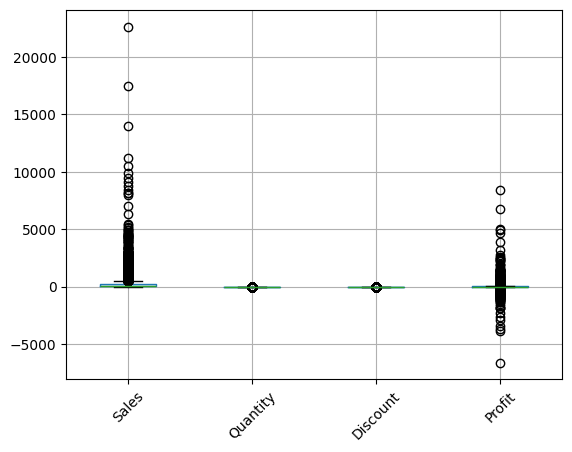

In [15]:
# Numerical columns analysis
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
df[num_cols].describe()

# Visualize outliers
import matplotlib.pyplot as plt
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

# Cap outliers (example for Sales)
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1
df['Sales'] = df['Sales'].clip(lower=q1-1.5*iqr, upper=q3+1.5*iqr)

In [16]:
# Standardize categorical values
df['Ship Mode'] = df['Ship Mode'].str.strip().str.title()
df['Segment'] = df['Segment'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()

# Check unique values
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']


In [17]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

Duplicate rows: 0


In [18]:
from dateutil import parser

def parse_date(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)  # Force day-first interpretation
    except:
        return pd.NaT

df['Order Date'] = df['Order Date'].apply(parse_date).dt.strftime('%d-%m-%Y')

In [19]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m-%d-%Y')

In [20]:
# Fix inconsistent customer name in row 20
df.loc[20, 'Customer Name'] = 'Zuschuss Donatelli'

In [21]:
# Validate business rules
# Example: Profit shouldn't be greater than Sales
invalid_profit = df[df['Profit'] > df['Sales']]
print(f"Invalid profit records: {len(invalid_profit)}")

# Example: Discount should be between 0-1
invalid_discount = df[(df['Discount'] < 0) | (df['Discount'] > 1)]
print(f"Invalid discount records: {len(invalid_discount)}")

Invalid profit records: 117
Invalid discount records: 0


In [22]:
# Create new features
df['Order Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Order Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Shipping Days'] = (pd.to_datetime(df['Ship Date']) - pd.to_datetime(df['Order Date'])).dt.days

# Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

In [23]:
# Clean product names
df['Product Name'] = df['Product Name'].str.strip()
df['Product Name'] = df['Product Name'].str.replace(r'\s+', ' ', regex=True)  # Remove extra spaces

In [24]:
# Check postal code format (US example)
us_postal = df[df['Country'] == 'United States']
invalid_zip = us_postal[~us_postal['Postal Code'].str.match(r'^\d{5}(-\d{4})?$')]
print(f"Invalid US ZIP codes: {len(invalid_zip)}")

Invalid US ZIP codes: 449


In [25]:
def data_quality_report(df):
    report = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Unique Values': df.nunique(),
        'Sample Values': [df[col].unique()[:3] for col in df.columns]
    })
    return report

data_quality_report(df)

,Data Type,Missing Values,Unique Values,Sample Values
Row ID,int64,0,9994,"[1, 2, 3]"
Order ID,object,0,5009,"[CA-2016-152156, CA-2016-138688, US-2015-108966]"
Order Date,datetime64[ns],9994,0,[NaT]
Ship Date,datetime64[ns],0,1334,"[2016-11-11 00:00:00, 2016-06-16 00:00:00, 201..."
Ship Mode,object,0,4,"[Second Class, Standard Class, First Class]"
Customer ID,object,0,793,"[CG-12520, DV-13045, SO-20335]"
Customer Name,object,0,794,"[Claire Gute, Darrin Van Huff, Sean O'Donnell]"
Segment,object,0,3,"[Consumer, Corporate, Home Office]"
Country,object,0,1,[United States]
City,object,0,531,"[Henderson, Los Angeles, Fort Lauderdale]"


In [26]:
# Save cleaned data
df.to_csv('Superstore_Cleaned.csv', index=False, encoding='utf-8')

EDA

In [27]:
# Summary statistics for numerical columns
df.describe()

# Categorical columns summary
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,794,3,1,531,49,631,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,263,3203,19,6026,1523,48


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [30]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [31]:
df = pd.read_csv('Superstore_Cleaned.csv')

In [32]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (9994, 25)

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Shipping Days,Profit Margin
0,1,CA-2016-152156,NaN,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,NaN,NaN,NaN,0.160000
1,2,CA-2016-152156,NaN,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3,0.00,219.5820,NaN,NaN,NaN,0.440106
2,3,CA-2016-138688,NaN,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.8714,NaN,NaN,NaN,0.470000
3,4,US-2015-108966,NaN,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,498.930,5,0.45,-383.0310,NaN,NaN,NaN,-0.767705
4,5,US-2015-108966,NaN,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.5164,NaN,NaN,NaN,0.112500



Data Types:
Row ID             int64
Order ID          object
Order Date       float64
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
Order Month      float64
Order Year       float64
Shipping Days    float64
Profit Margin    float64
dtype: object

Missing Values:
Row ID              0
Order ID            0
Order Date       9994
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
S

In [33]:
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit,Order Month,Order Year,Shipping Days,Profit Margin
count,9994.000000,0.0,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0,0.0,0.0,9994.000000
mean,4997.500000,NaN,55190.379428,140.281105,3.789574,0.156203,28.656896,NaN,NaN,NaN,0.146403
std,2885.163629,NaN,32063.693350,168.804241,2.225110,0.206452,234.260108,NaN,NaN,NaN,0.644256
min,1.000000,NaN,1040.000000,0.444000,1.000000,0.000000,-6599.978000,NaN,NaN,NaN,-13.228264
25%,2499.250000,NaN,23223.000000,17.280000,2.000000,0.000000,1.728750,NaN,NaN,NaN,0.075000
50%,4997.500000,NaN,56430.500000,54.490000,3.000000,0.200000,8.666500,NaN,NaN,NaN,0.280000
75%,7495.750000,NaN,90008.000000,209.940000,5.000000,0.200000,29.364000,NaN,NaN,NaN,0.380000
max,9994.000000,NaN,99301.000000,498.930000,14.000000,0.800000,8399.976000,NaN,NaN,NaN,16.835981


In [34]:
print("\nDescriptive Statistics for Categorical Columns:")
display(df.describe(include=['object']))


Descriptive Statistics for Categorical Columns:


,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1334,4,793,794,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,2015-12-16,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


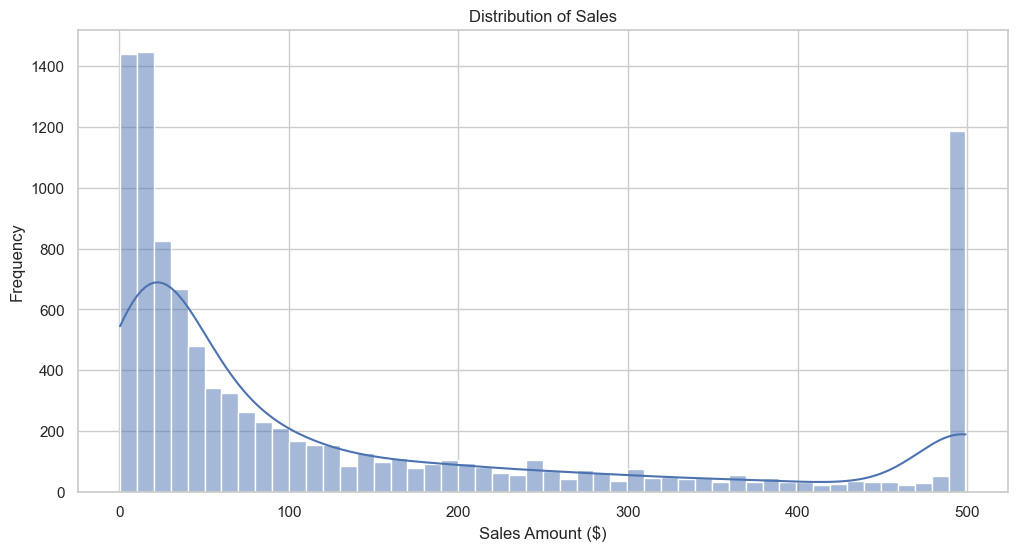

In [35]:
# 1. Sales Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')
plt.show()

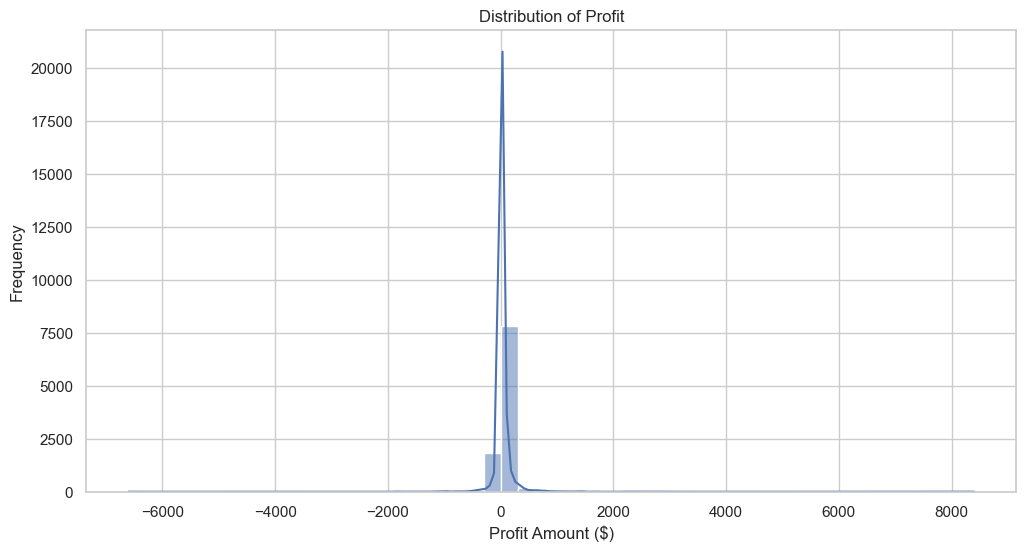

In [36]:
# 2. Profit Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit Amount ($)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\4042101971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


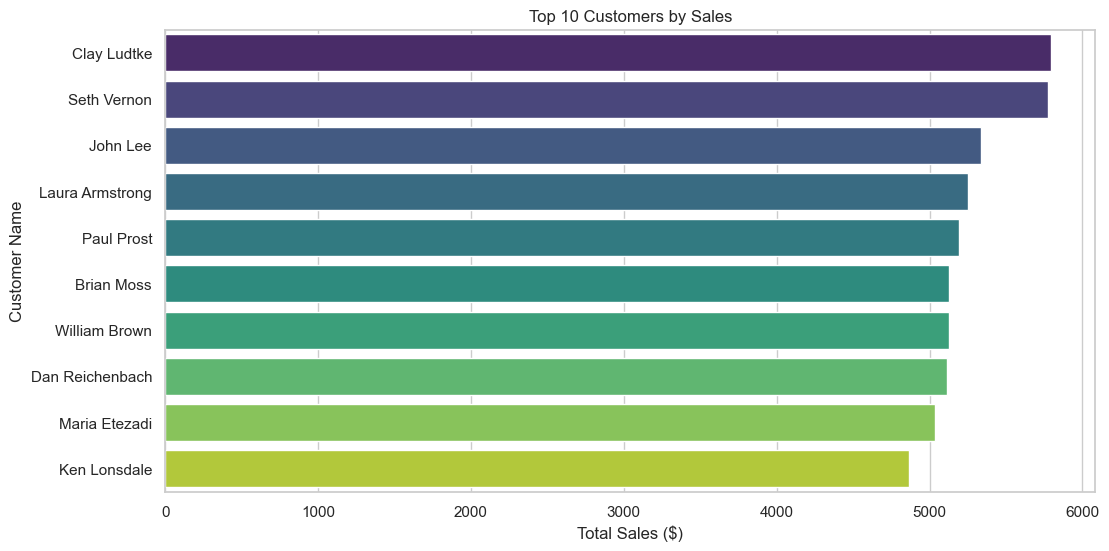

In [37]:
# 3. Top 10 Customers by Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Name')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\3758494470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')


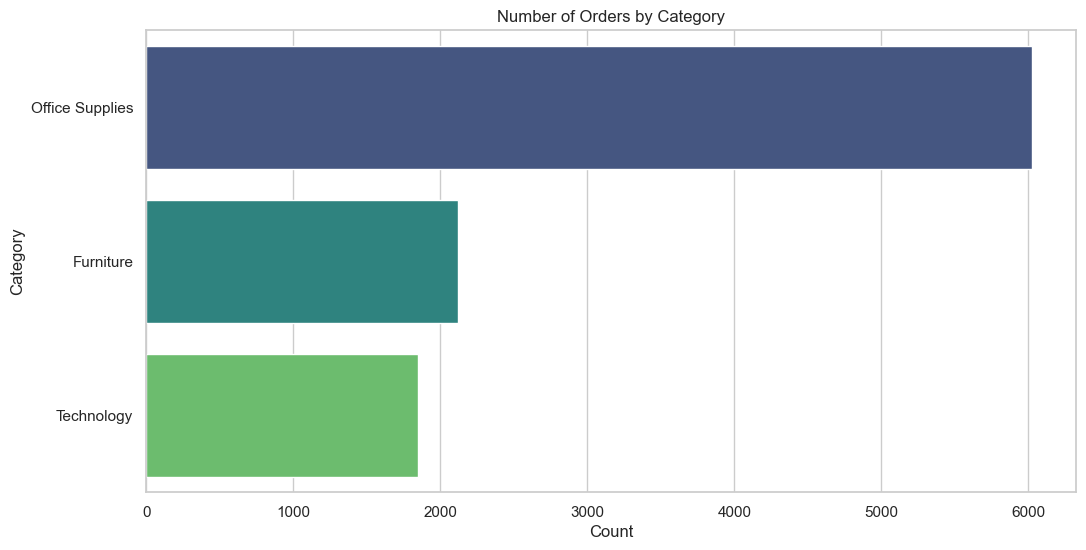

In [38]:
# 4. Sales by Category
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Orders by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\1565747392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index, palette='viridis')


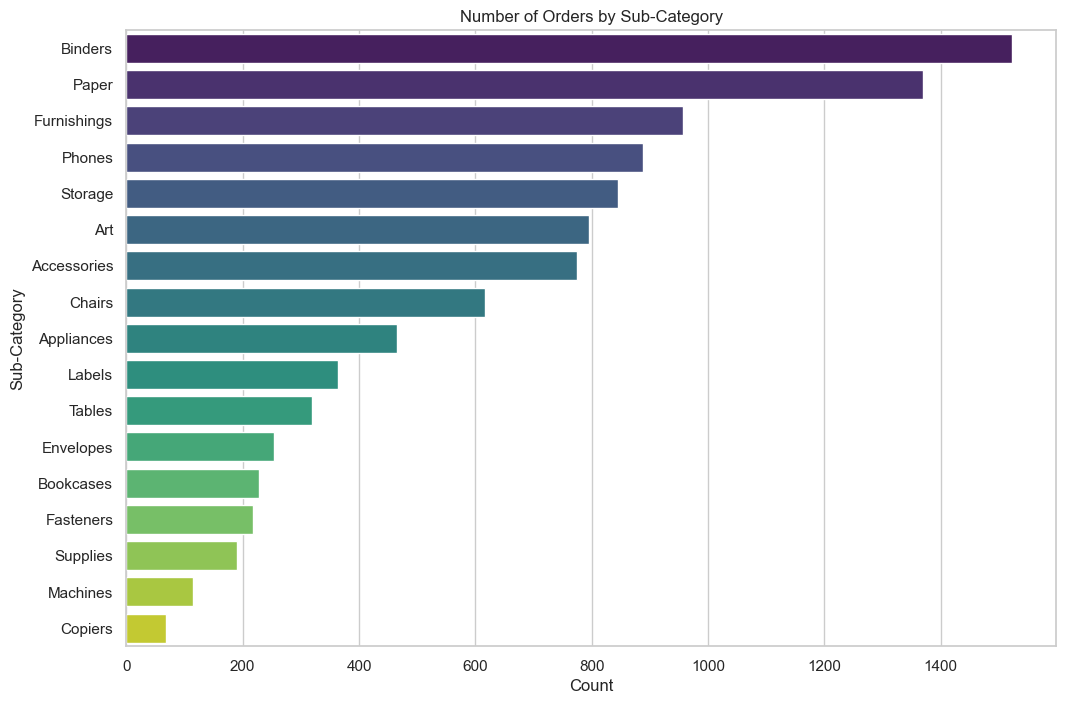

In [39]:
# 5. Sales by Sub-Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index, palette='viridis')
plt.title('Number of Orders by Sub-Category')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.show()

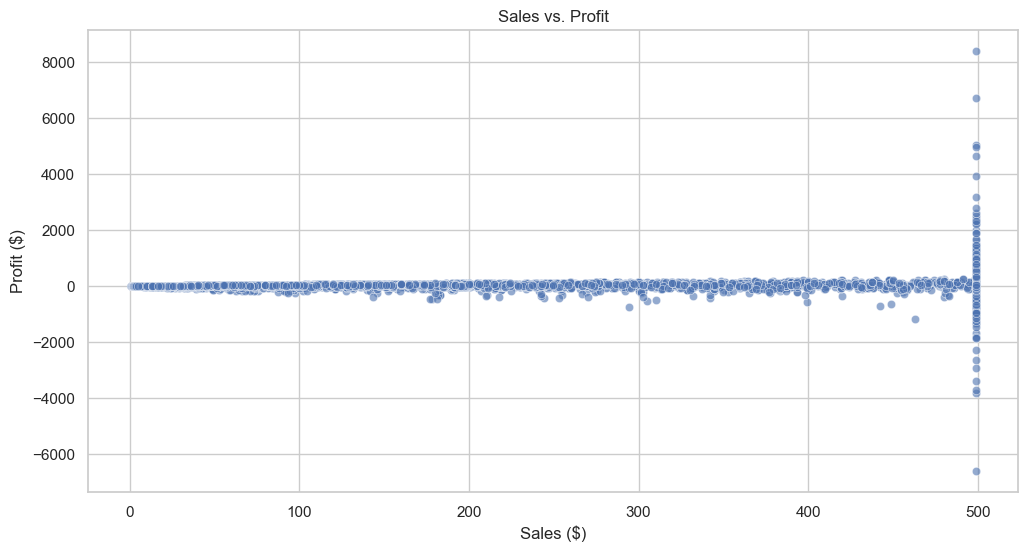

In [42]:
# 1. Sales vs. Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, alpha=0.6)
plt.title('Sales vs. Profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\879107735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=df, palette='viridis')


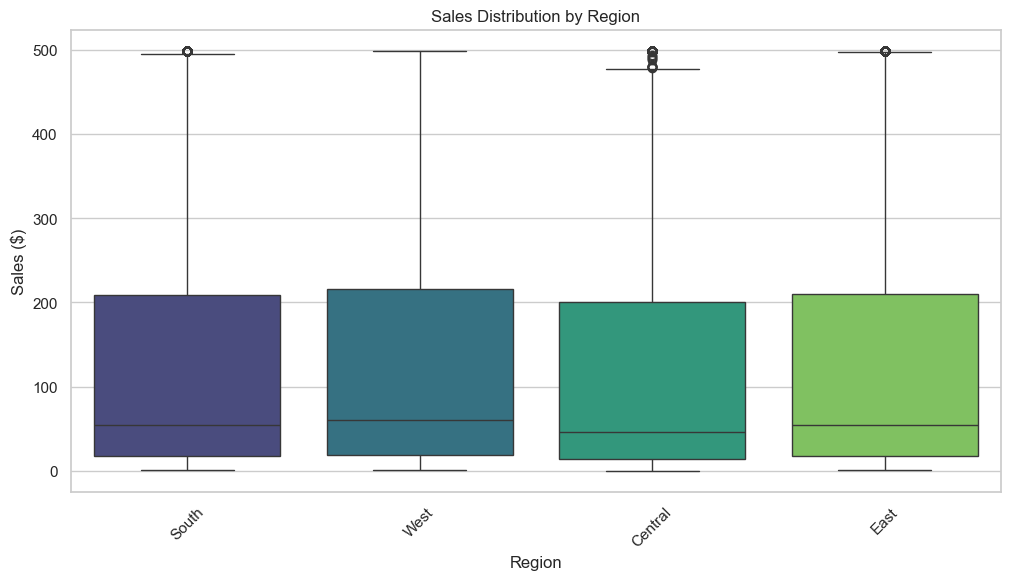

In [43]:
# 2. Sales by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=df, palette='viridis')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\3660315197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Profit', data=df, palette='viridis')


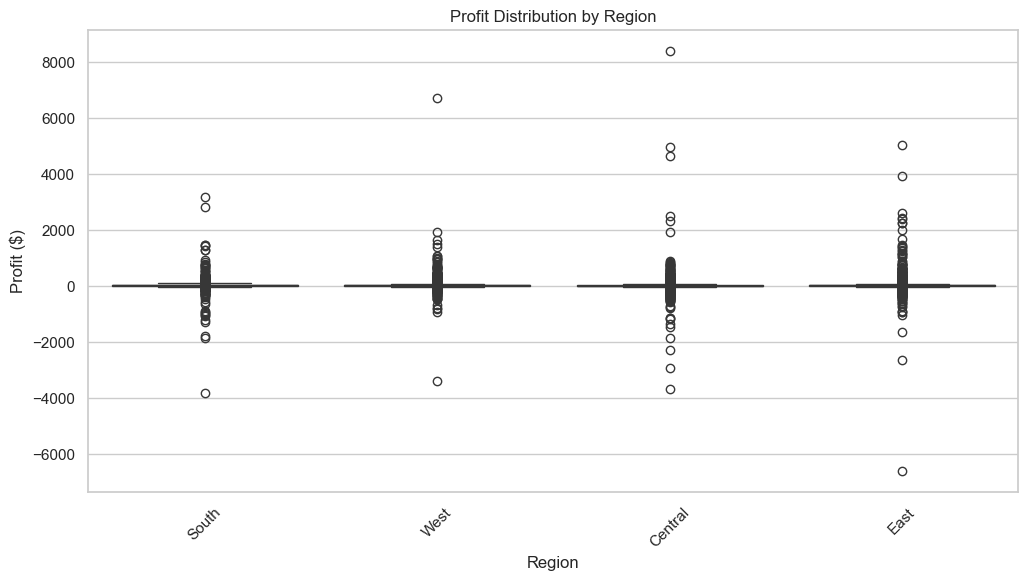

In [44]:
#  Profit by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Profit', data=df, palette='viridis')
plt.title('Profit Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\1277724705.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\1277724705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


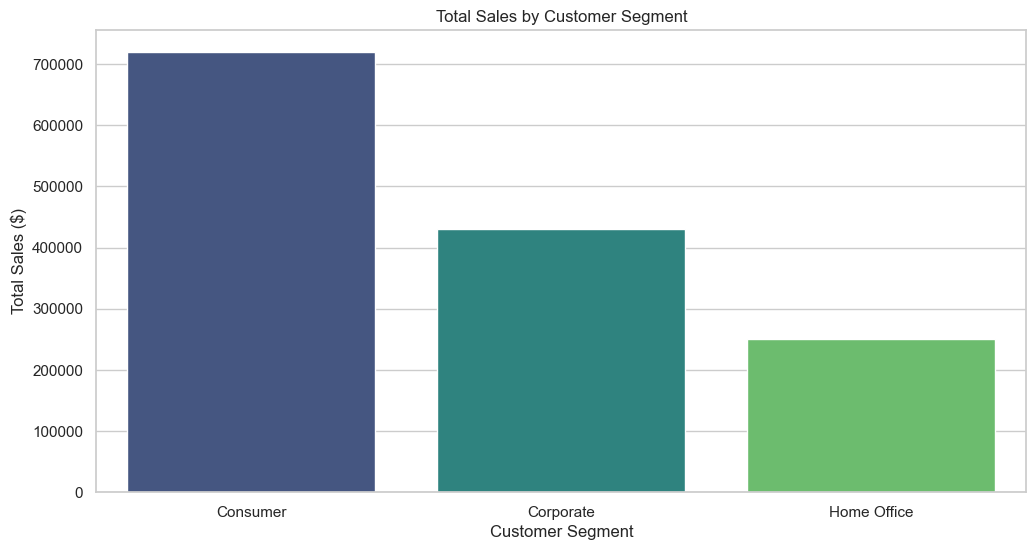

In [45]:
# 4. Sales by Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\521645401.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')
C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\521645401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')


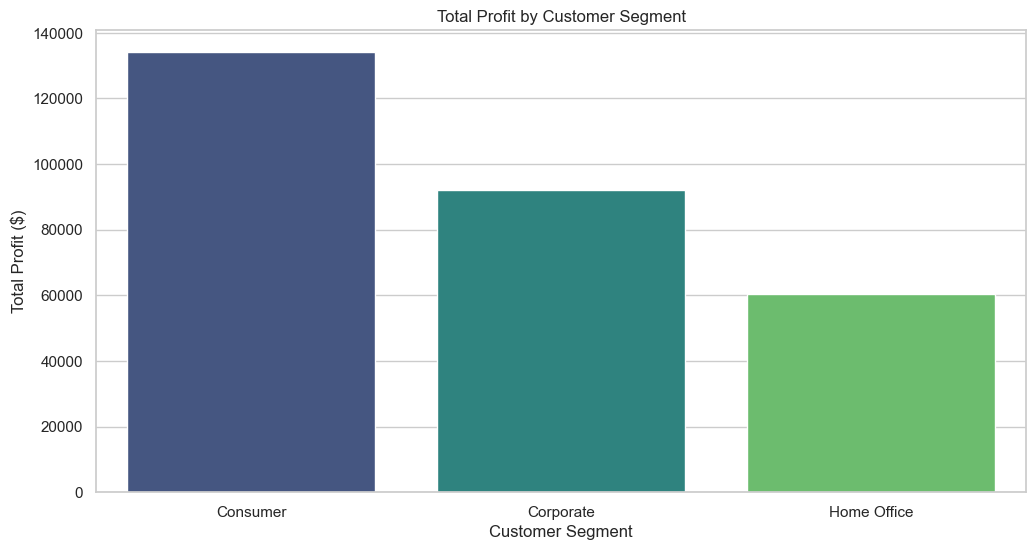

In [46]:
# 5. Profit by Segment
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Profit', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit ($)')
plt.show()

In [47]:
#  Sales and Profit by Category and Sub-Category
category_subcat = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
display(category_subcat)

Sales      Profit
Category        Sub-Category                         
Technology      Phones        222360.8380  44515.7306
Furniture       Chairs        206182.5770  26590.1663
Office Supplies Storage       165554.0160  21278.8264
Technology      Accessories   127450.8540  41936.6357
Furniture       Tables        117680.8275 -17725.4811
Office Supplies Binders       100926.6150  30221.7633
Furniture       Furnishings    85028.9820  13059.1436
Office Supplies Paper          77853.6760  34053.5693
                Appliances     74669.7830  18138.0054
Furniture       Bookcases      71985.6219  -3472.5560
Technology      Machines       44895.7670   3384.7569
                Copiers        33279.8940  55617.8249
Office Supplies Art            26504.6980   6527.7870
                Envelopes      16370.6760   6964.1767
                Supplies       16131.7520  -1189.0995
                Labels         12068.5080   5546.2540
                Fasteners       3024.2800    949.5182

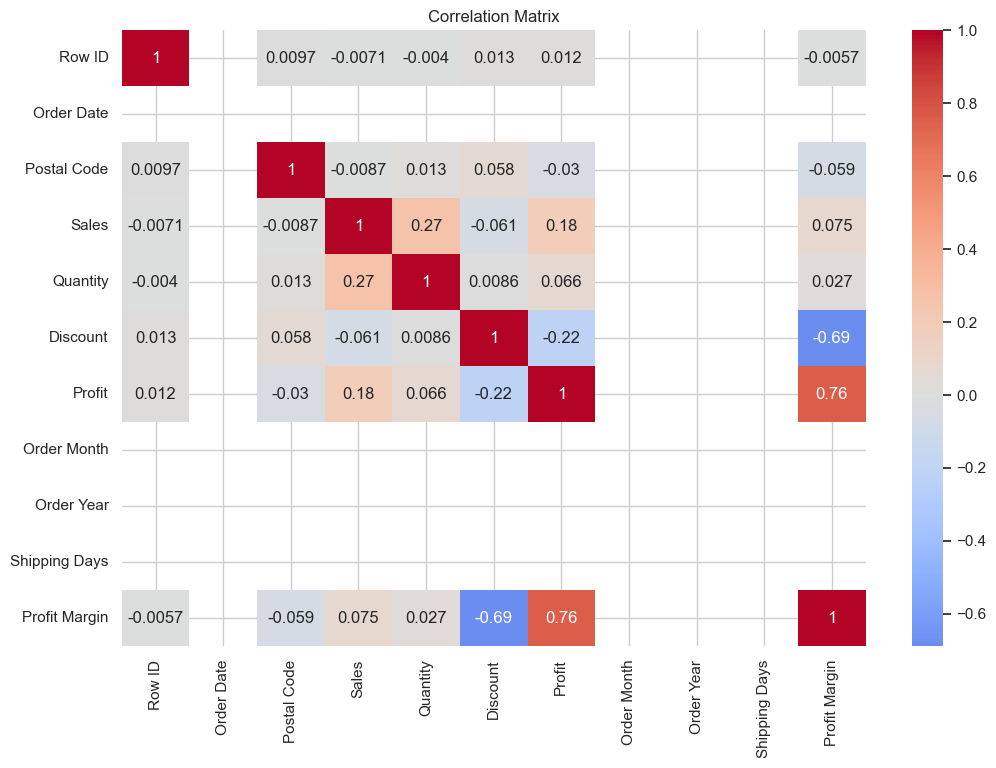

In [48]:
#  Correlation Matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

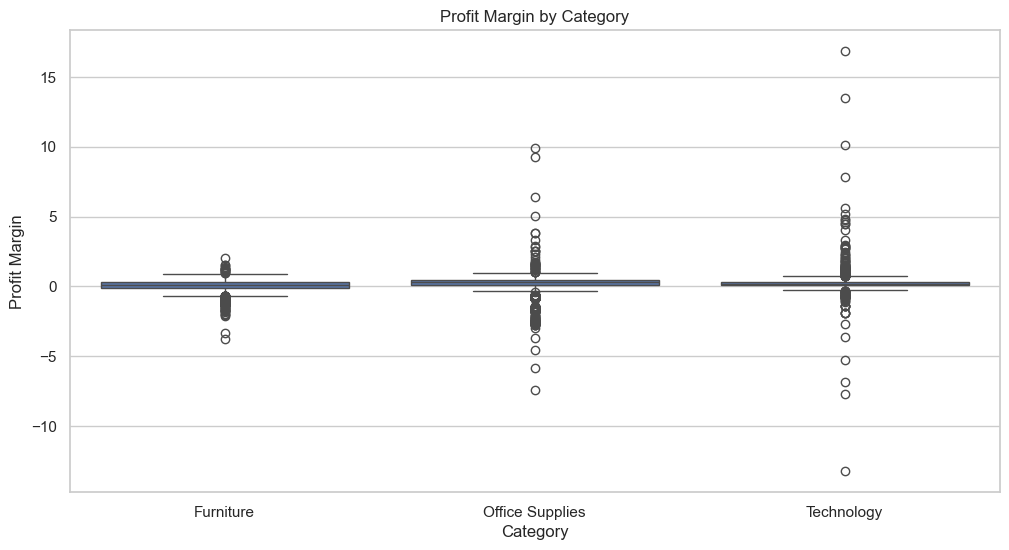

In [50]:
# 4. Profit Margin Analysis
df['Profit Margin'] = df['Profit'] / df['Sales']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Profit Margin', data=df)
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.show()

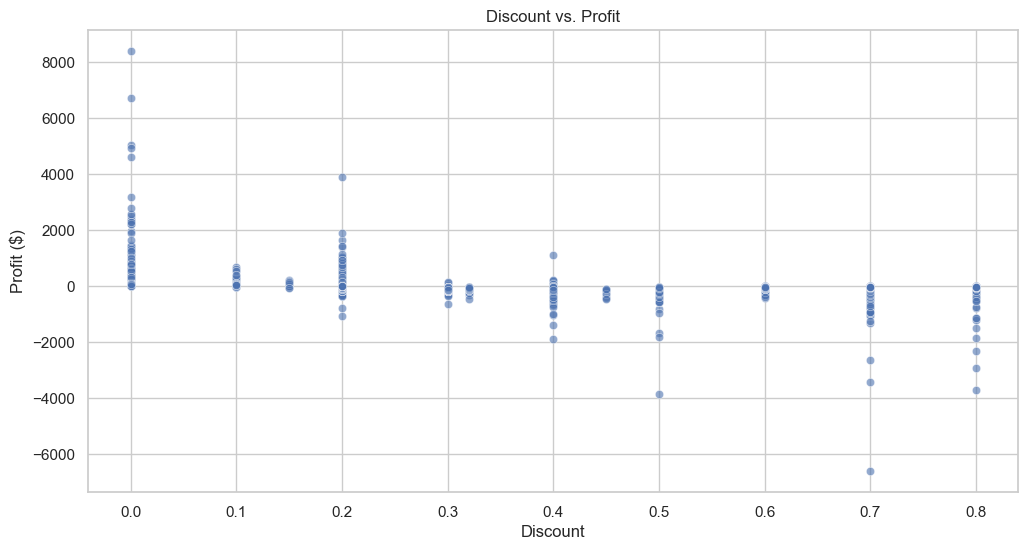

In [51]:

# 5. Discount Impact on Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.6)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\2645916980.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profitable.values, y=top_profitable.index, palette='viridis')


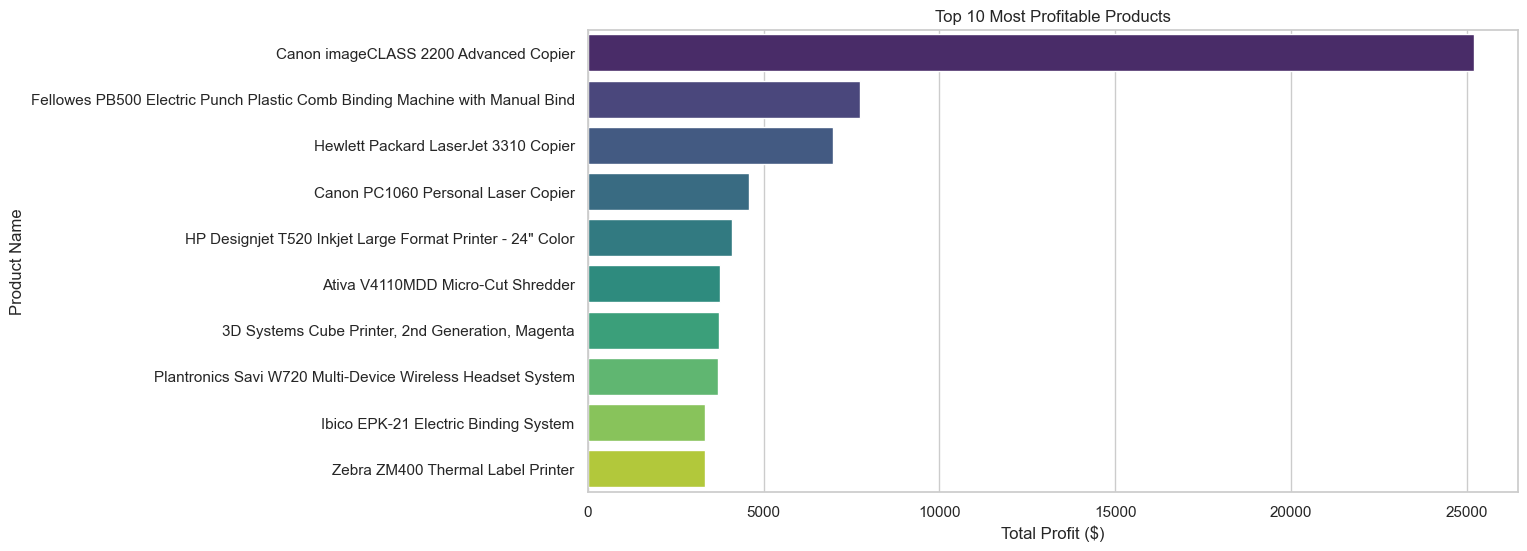

In [52]:
#  Top Profitable Products
top_profitable = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profitable.values, y=top_profitable.index, palette='viridis')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\720393307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_profitable.values, y=least_profitable.index, palette='viridis')


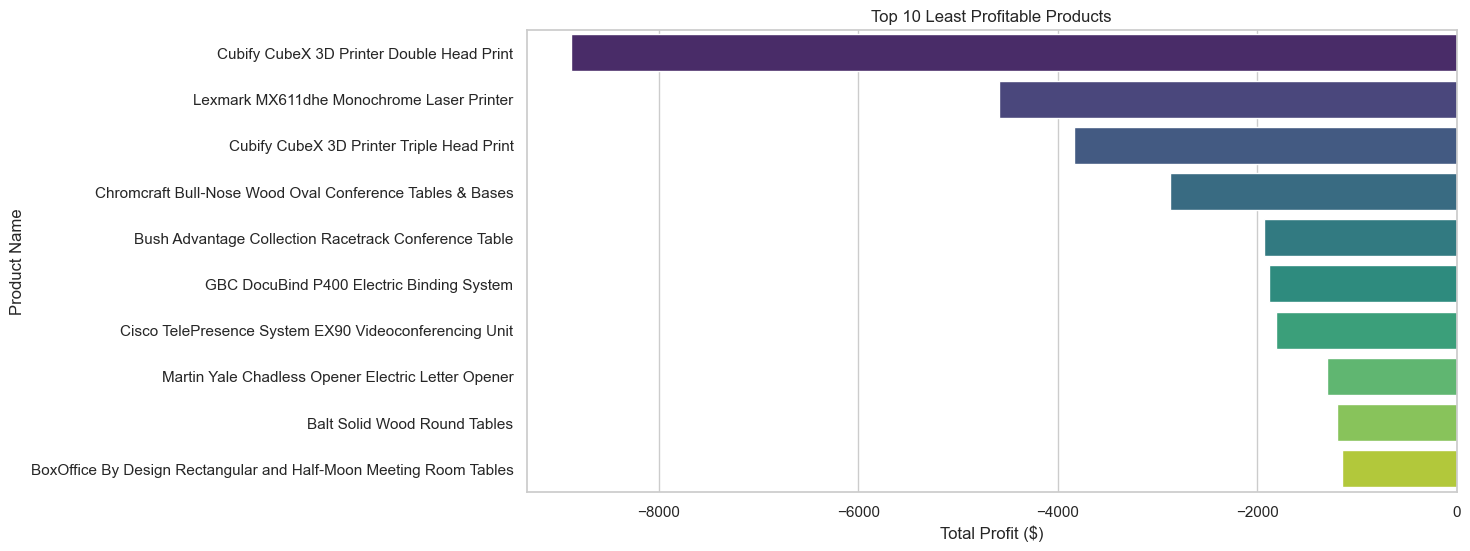

In [53]:
#  Least Profitable Products
least_profitable = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=least_profitable.values, y=least_profitable.index, palette='viridis')
plt.title('Top 10 Least Profitable Products')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\1671295315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ship Mode', data=df, palette='viridis')


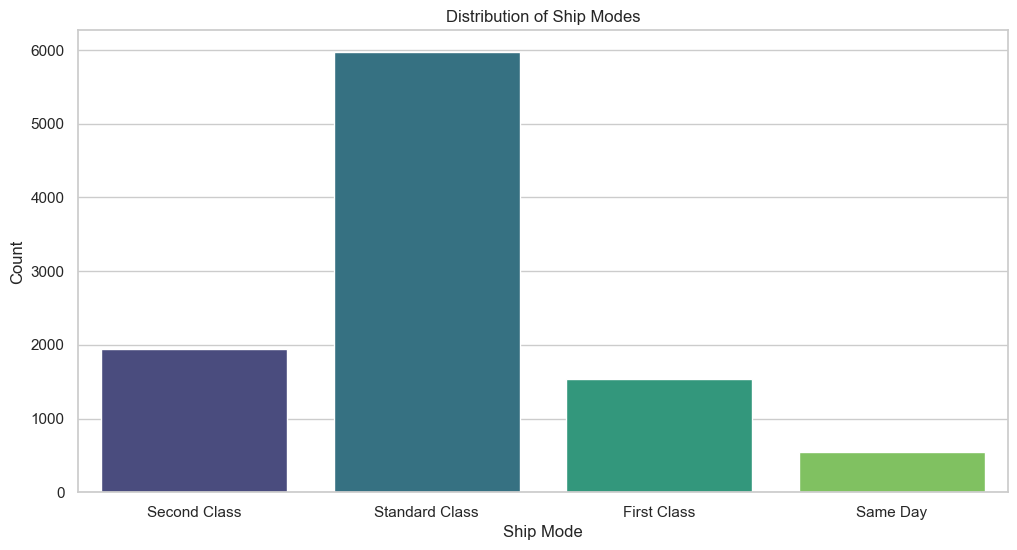

In [54]:
#  Ship Mode Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Ship Mode', data=df, palette='viridis')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_28592\658125554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ship Mode', y='Profit', data=df, palette='viridis')


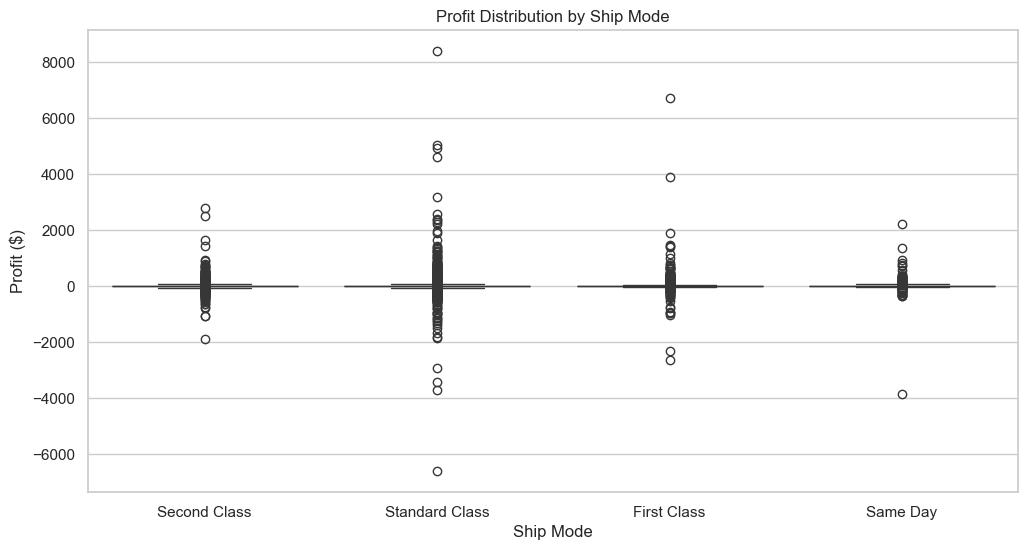

In [55]:
#  Profitability by Ship Mode
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ship Mode', y='Profit', data=df, palette='viridis')
plt.title('Profit Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Profit ($)')
plt.show()

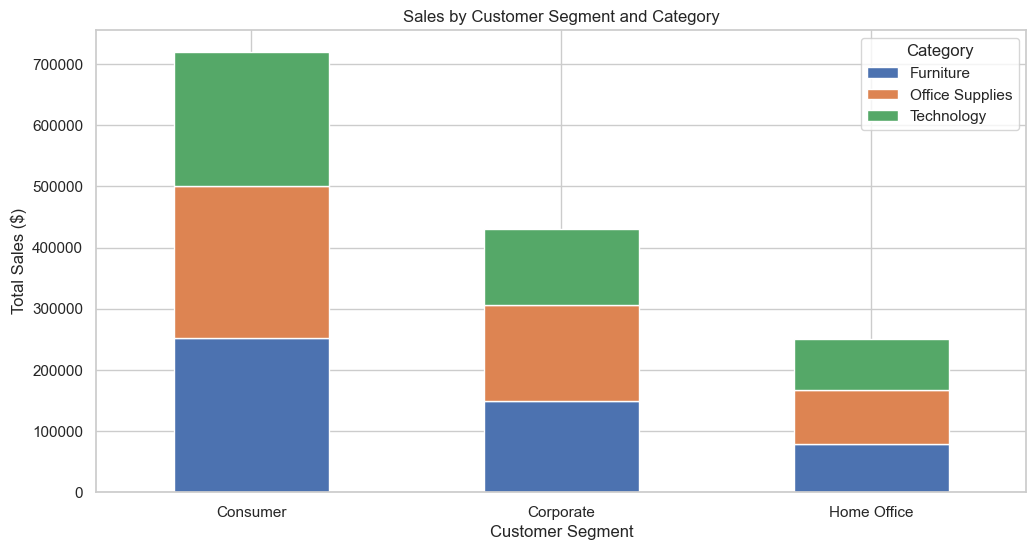

In [56]:
#  Customer Segmentation Analysis
customer_segmentation = df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()
customer_segmentation.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Customer Segment and Category')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.show()

In [57]:
# Total Sales
total_sales = df['Sales'].sum()

# Total Profit
total_profit = df['Profit'].sum()

# Total Quantity Sold
total_quantity = df['Quantity'].sum()

# Average Discount
average_discount = df['Discount'].mean()

# Overall Profit Margin
profit_margin = total_profit / total_sales if total_sales else 0

# Display KPIs
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Average Discount: {average_discount:.2%}")
print(f"Overall Profit Margin: {profit_margin:.2%}")


Total Sales: $1,401,969.37
Total Profit: $286,397.02
Total Quantity Sold: 37873
Average Discount: 15.62%
Overall Profit Margin: 20.43%


In [58]:
# Top 5 Categories by Sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Top 5 Sub-Categories by Profit
top_subcategories = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

print("Top Categories by Sales:")
print(top_categories)

print("\nTop Sub-Categories by Profit:")
print(top_subcategories)


Top Categories by Sales:
Category
Office Supplies    493104.0040
Furniture          480878.0084
Technology         427987.3530
Name: Sales, dtype: float64

Top Sub-Categories by Profit:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64
